In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
data = pd.read_csv('covid_data.csv') 

In [3]:
print(data.head())  # show first 5 rows
print(data.info())  # summary of data
print(data.describe())  # statistics

  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

In [7]:
# Select a column
cases = data['Confirmed']
# Select multiple columns
data[['Confirmed', 'Deaths']]
# Filter rows
high_cases = data[data['Confirmed'] > 10000]

In [15]:
print(high_cases)

           Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0             Afghanistan      36263    1269      25198    9796        106   
2                 Algeria      27973    1163      18837    7973        616   
6               Argentina     167416    3059      72575   91782       4890   
7                 Armenia      37390     711      26665   10014         73   
8               Australia      15303     167       9311    5825        368   
..                    ...        ...     ...        ...     ...        ...   
176  United Arab Emirates      59177     345      52510    6322        264   
177        United Kingdom     301708   45844       1437  254427        688   
179            Uzbekistan      21209     121      11674    9414        678   
180             Venezuela      15988     146       9959    5883        525   
182    West Bank and Gaza      10621      78       3752    6791        152   

     New deaths  New recovered  Deaths / 100 Cases  Recovered /

In [9]:
# Group by country and sum cases
grouped = data.groupby('Country/Region')['Confirmed'].sum().reset_index()
print(grouped.sort_values(by='Confirmed', ascending=False).head())


    Country/Region  Confirmed
173             US    4290259
23          Brazil    2442375
79           India    1480073
138         Russia     816680
154   South Africa     452529


In [13]:
group = data.groupby('Country/Region')['Deaths'].sum().reset_index()

In [17]:
print(group.head(5))

  Country/Region  Deaths
0    Afghanistan    1269
1        Albania     144
2        Algeria    1163
3        Andorra      52
4         Angola      41


In [39]:
group1 = data.groupby('Country/Region')[['Recovered', 'Deaths']].sum().reset_index().head(5)
print(group1.sort_values(by='Recovered', ascending = False).head())

  Country/Region  Recovered  Deaths
0    Afghanistan      25198    1269
2        Algeria      18837    1163
1        Albania       2745     144
3        Andorra        803      52
4         Angola        242      41


In [41]:
print(data.isnull().sum())

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64


In [43]:
data = data[data['Confirmed'] >= 0]

In [45]:
print(data.duplicated().sum())


0


In [51]:
top_confirmed = data.sort_values(by='Confirmed', ascending=False).head(5)
print(top_confirmed[['Country/Region', 'Confirmed']])


    Country/Region  Confirmed
173             US    4290259
23          Brazil    2442375
79           India    1480073
138         Russia     816680
154   South Africa     452529


C:\Users\Smit\AppData\Local\Temp\ipykernel_28364\1378300316.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country/Region', y='Confirmed', data=top_confirmed, palette='Reds_r')


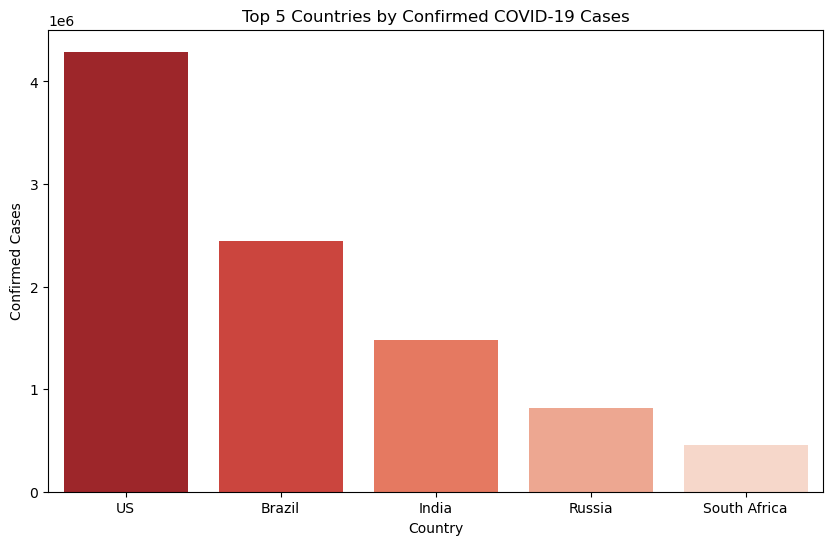

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x='Country/Region', y='Confirmed', data=top_confirmed, palette='Reds_r')
plt.title("Top 5 Countries by Confirmed COVID-19 Cases")
plt.ylabel("Confirmed Cases")
plt.xlabel("Country")
plt.show()


In [59]:
top_deaths = data.groupby('Country/Region')['Deaths'].sum().reset_index()
print(top_deaths.sort_values(by='Deaths',ascending=False).head(5))

     Country/Region  Deaths
173              US  148011
23           Brazil   87618
177  United Kingdom   45844
111          Mexico   44022
85            Italy   35112


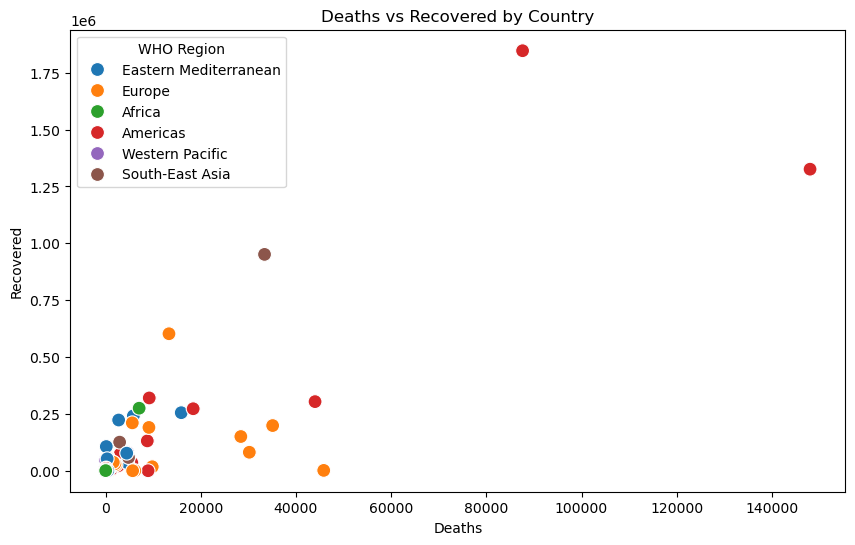

In [69]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Deaths', y='Recovered', data=data, hue='WHO Region', s=100)
plt.title("Deaths vs Recovered by Country")
plt.xlabel("Deaths")
plt.ylabel("Recovered")
plt.show()

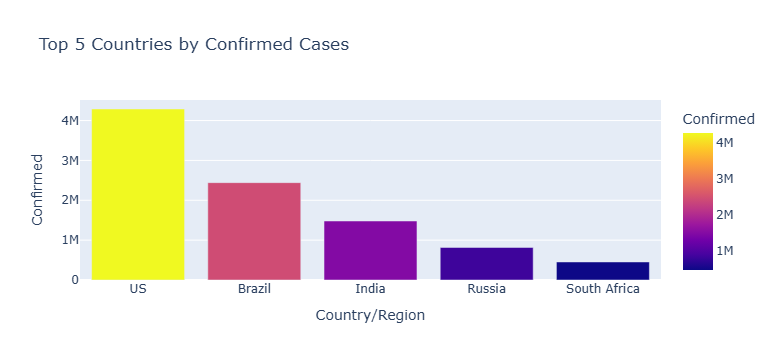

In [75]:
import plotly.express as px
top_confirmed = data.sort_values(by='Confirmed', ascending=False).head(5)

fig = px.bar(top_confirmed, 
             x='Country/Region', 
             y='Confirmed', 
             color='Confirmed',  # colors bars by value
             title='Top 5 Countries by Confirmed Cases')

fig.show()
